"""Porjecto de Analise de Vendas de uma loja E-commerce"""

In [17]:
!pip install -q -u watermark


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [18]:
# Importando as bibliotecas para manipulacao de tabelas e visualizacao de dados
import pandas as pd
#importando a bibliteca numpy para operacoes matematicas
import numpy as np
#importando a biblioteca matplotlib para graficos
import matplotlib.pyplot as plt
#importando a biblioteca seaborn para graficos mais estatistica
import seaborn as sns
#importanado randonm para gerar numeros aleatorios
import random
#importando a biblioteca datetime para trabalhar com datas
from datetime import datetime, timedelta

"""Função Para Gerar dados Fícticios"""

In [19]:
#Definição da função para gerar dados fictícios de vendas
def gerar_dados_vendas(num_vendas = 600):
    """Gera um Dtaframe com Pandas com dados de vendas fictícias para um e-commerce"""

#Mensagem inicial idincando a quantidade de registro a serem gerados
    print(f"\n Iniciando a geração de {num_vendas} registros de vendas")

#Dicionario com produtos, suas categorias e preços
    produtos = {
  'Laptop Gamer': {'categoria': 'Eletrônicos', 'preco': 1500},
  'Mouse Vertical:': {'categoria': 'Eletrônicos', 'preco': 80},
  'Teclado Mecânico': {'categoria': 'Eletrônicos', 'preco': 200},
  'Monitor Ultrawide': {'categoria': 'Eletrônicos', 'preco': 800},
  'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 500},
  'Mesa para Escritório': {'categoria': 'Móveis', 'preco': 300},
  'Placa de Vídeo': {'categoria': 'Eletrônicos', 'preco': 1200},
  'SSD 1TB': {'categoria': 'Eletrônicos', 'preco': 250},
  }
#Cria uma lista apenas com os nomes dos produtos
    lista_produtos = list(produtos.keys())

#Dicionario com cidade e seus respectivos estados
    cidades = {
  'São Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG', 'Curitiba': 'PR',
  'Porto Alegre': 'RS', 'Salvador': 'BA', 'Fortaleza': 'CE',
  }

#Cria uma lista apenas com os nomes das cidades
    lista_cidades = list(cidades.keys())

#lista para armazenar os dados de vendas
    dados_vendas = []

#Definindo a data de início para as vendas
    data_inicio = datetime(2023, 1, 1)

#Loop para gerar os dados de vendas
    for i in range(num_vendas):
      #seleciona um produto aleatório
        produto_nome = random.choice(lista_produtos)

      #selecina uma cidade aleatória
        cidade_nome = random.choice(lista_cidades)

      #gera quantidade vendida entre 1 e 7
        quantidade = np.random.randint(1, 8)

      #Calcula o pedido apartir da data inicial
        data_pedido = data_inicio + timedelta(days = int(i/5), hours = random.randint(0, 23))

      #se o produto for Mouse ou Teclado, aplica desconto de 10%
        if produto_nome in ['Mouse Vertical:', 'Teclado Mecânico']:
            preco_unitario = produtos[produto_nome]['preco'] * np.random.uniform(0.9, 1.0)
        else:
            preco_unitario = produtos[produto_nome]['preco']

      #Adiciona um registro de venda a lista
        dados_vendas.append({
            'Id_Pedido': 100 + i ,
            'Nome_Produto': produto_nome,
            'Categoria': produtos[produto_nome]['categoria'],
            'Preço_Unitário': round(preco_unitario, 2),
            'Quantidade': quantidade,
            'Valor_Total': preco_unitario * quantidade,
            'Cidade': cidade_nome,
            'Estado': cidades[cidade_nome],
            'Data_do_Pedido': data_pedido
        })
#Mensagem final indicando a conclusão da geração de dados
    print(f"Gerados {num_vendas} registros de vendas com sucesso!")
#Cria um DataFrame com os dados de vendas
    df_vendas = pd.DataFrame(dados_vendas)
    return df_vendas




In [20]:
df_vendas = gerar_dados_vendas(600)


 Iniciando a geração de 600 registros de vendas
Gerados 600 registros de vendas com sucesso!


In [21]:
#Shape do DataFrame
df_vendas.shape

(600, 9)

In [22]:
#exibir as 5 primeiras linhas do DataFrame
df_vendas.head()

,Id_Pedido,Nome_Produto,Categoria,Preço_Unitário,Quantidade,Valor_Total,Cidade,Estado,Data_do_Pedido
0,100,Laptop Gamer,Eletrônicos,1500.00,7,10500.000000,Rio de Janeiro,RJ,2023-01-01 10:00:00
1,101,Cadeira Gamer,Móveis,500.00,6,3000.000000,São Paulo,SP,2023-01-01 17:00:00
2,102,Laptop Gamer,Eletrônicos,1500.00,3,4500.000000,Salvador,BA,2023-01-01 01:00:00
3,103,Teclado Mecânico,Eletrônicos,181.26,2,362.517369,Fortaleza,CE,2023-01-01 22:00:00
4,104,Cadeira Gamer,Móveis,500.00,7,3500.000000,Fortaleza,CE,2023-01-01 16:00:00


In [23]:
#exibe as ultimas 5 linhas do DataFrame
df_vendas.tail()

,Id_Pedido,Nome_Produto,Categoria,Preço_Unitário,Quantidade,Valor_Total,Cidade,Estado,Data_do_Pedido
595,695,Mouse Vertical:,Eletrônicos,74.01,4,296.032041,Fortaleza,CE,2023-04-30 23:00:00
596,696,Laptop Gamer,Eletrônicos,1500.00,6,9000.000000,Salvador,BA,2023-04-30 02:00:00
597,697,SSD 1TB,Eletrônicos,250.00,3,750.000000,Curitiba,PR,2023-04-30 09:00:00
598,698,Mouse Vertical:,Eletrônicos,75.28,2,150.563580,Belo Horizonte,MG,2023-04-30 17:00:00
599,699,Placa de Vídeo,Eletrônicos,1200.00,5,6000.000000,Belo Horizonte,MG,2023-04-30 00:00:00


In [24]:
#Exibe informações sobre o DataFrame
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id_Pedido       600 non-null    int64         
 1   Nome_Produto    600 non-null    object        
 2   Categoria       600 non-null    object        
 3   Preço_Unitário  600 non-null    float64       
 4   Quantidade      600 non-null    int64         
 5   Valor_Total     600 non-null    float64       
 6   Cidade          600 non-null    object        
 7   Estado          600 non-null    object        
 8   Data_do_Pedido  600 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 42.3+ KB


In [25]:
#Resumo estatístico das colunas numéricas
df_vendas.describe()

,Id_Pedido,Preço_Unitário,Quantidade,Valor_Total,Data_do_Pedido
count,600.000000,600.000000,600.000000,600.000000,600
mean,399.500000,638.636083,3.955000,2561.019584,2023-03-01 23:28:53.999999744
min,100.000000,72.140000,1.000000,72.424969,2023-01-01 01:00:00
25%,249.750000,197.250000,2.000000,600.000000,2023-01-31 00:30:00
50%,399.500000,500.000000,4.000000,1500.000000,2023-03-02 00:30:00
75%,549.250000,1200.000000,6.000000,3600.000000,2023-03-31 23:15:00
max,699.000000,1500.000000,7.000000,10500.000000,2023-04-30 23:00:00
std,173.349358,507.188791,2.000745,2640.100034,NaN


In [26]:
#tipos de dados
df_vendas.dtypes

Id_Pedido                  int64
Nome_Produto              object
Categoria                 object
Preço_Unitário           float64
Quantidade                 int64
Valor_Total              float64
Cidade                    object
Estado                    object
Data_do_Pedido    datetime64[ns]
dtype: object

"""Limpeza, Pre-processamento e Eng.Atributos"""

In [27]:
#Se a coluna 'Data_pedido' nao estiver como tipo datetime, precisamos fazer a conversao explicita
#A coluna pode ser usada para analise temporal
df_vendas['Data_do_Pedido']= pd.to_datetime(df_vendas['Data_do_Pedido'])

In [28]:
#Engenharia de Atributos
#usando uma funcao lambda para criar uma coluna de status de entraga
df_vendas['Status_Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rapida' if estado in ['SP', 'RJ', 'MG'] else 'Normal')

In [29]:
#Engenharia de Atributos
#Criando coluna faturamento (preco x quantidade)
df_vendas['Faturamento'] = df_vendas['Preço_Unitário'] * df_vendas['Quantidade']

In [30]:
#exibindo infomacoes gerais
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id_Pedido       600 non-null    int64         
 1   Nome_Produto    600 non-null    object        
 2   Categoria       600 non-null    object        
 3   Preço_Unitário  600 non-null    float64       
 4   Quantidade      600 non-null    int64         
 5   Valor_Total     600 non-null    float64       
 6   Cidade          600 non-null    object        
 7   Estado          600 non-null    object        
 8   Data_do_Pedido  600 non-null    datetime64[ns]
 9   Status_Entrega  600 non-null    object        
 10  Faturamento     600 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 51.7+ KB


In [31]:
df_vendas.head()

,Id_Pedido,Nome_Produto,Categoria,Preço_Unitário,Quantidade,Valor_Total,Cidade,Estado,Data_do_Pedido,Status_Entrega,Faturamento
0,100,Laptop Gamer,Eletrônicos,1500.00,7,10500.000000,Rio de Janeiro,RJ,2023-01-01 10:00:00,Rapida,10500.00
1,101,Cadeira Gamer,Móveis,500.00,6,3000.000000,São Paulo,SP,2023-01-01 17:00:00,Rapida,3000.00
2,102,Laptop Gamer,Eletrônicos,1500.00,3,4500.000000,Salvador,BA,2023-01-01 01:00:00,Normal,4500.00
3,103,Teclado Mecânico,Eletrônicos,181.26,2,362.517369,Fortaleza,CE,2023-01-01 22:00:00,Normal,362.52
4,104,Cadeira Gamer,Móveis,500.00,7,3500.000000,Fortaleza,CE,2023-01-01 16:00:00,Normal,3500.00


"""Analise 1 - Top 10 Produtos Mais Vendidos"""

In [33]:
#Agrupa por nomes de produtos, soma a quantidade e oredena para encontar os mais vendidos
top_10_produtos = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)

In [34]:
top_10_produtos

Nome_Produto
Laptop Gamer            378
Monitor Ultrawide       327
Teclado Mecânico        324
Placa de Vídeo          300
Mouse Vertical:         295
Cadeira Gamer           257
Mesa para Escritório    249
SSD 1TB                 243
Name: Quantidade, dtype: int64

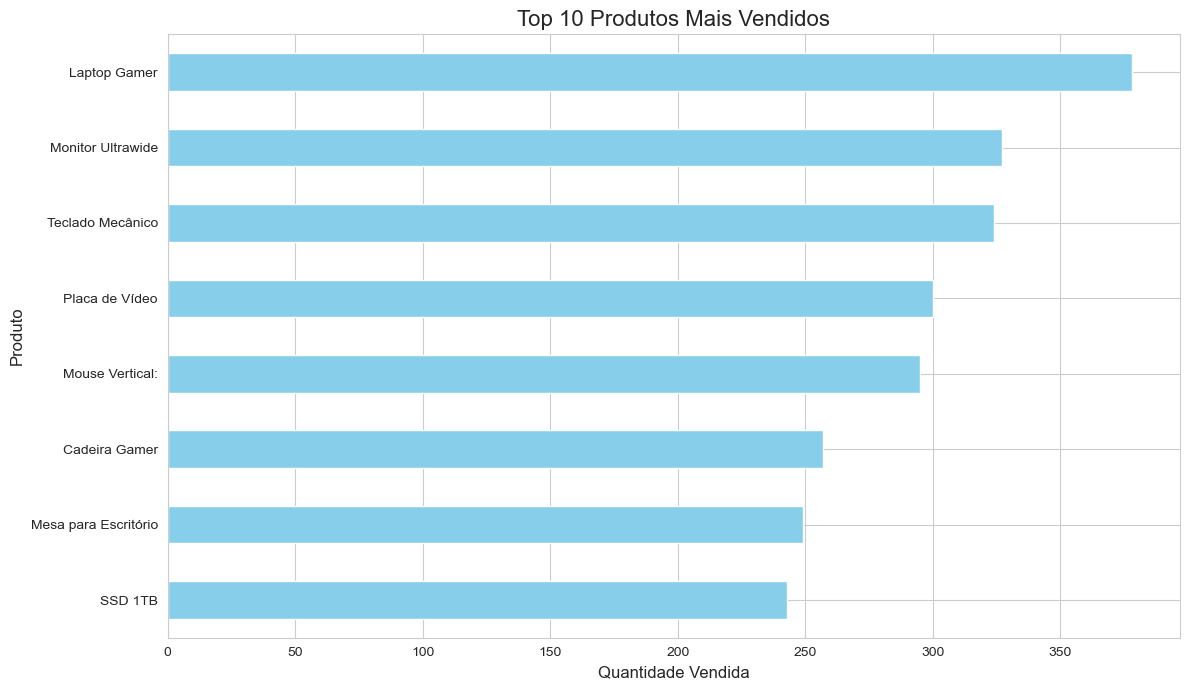

In [35]:
#Define um estilo para graficos8
sns.set_style('whitegrid')

#cria a figura e os eixos
plt.figure(figsize=(12,7))

#cria o grafico de barras horizontal
top_10_produtos.sort_values(ascending= True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Produtos Mais Vendidos', fontsize=16)
plt.xlabel('Quantidade Vendida', fontsize=12)
plt.ylabel('Produto', fontsize=12)

plt.tight_layout()
plt.show()